<a href="https://colab.research.google.com/github/akhiluthappa1/deeplearning/blob/main/Multimodal_Gaussian_Distirbution%2C_F_test_with_Ridge%2C_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Building a multimodal Gaussian distribution with synthetic data.

we are generating data from three Gaussian distributions with means of -2, 0, and 2 and standard deviations of 0.5, 1, and 1.5, respectively. We generate 100 data points from each distribution and then concatenate them into a single array. Finally, we plot a histogram of the data and overlay the individual Gaussian distributions.

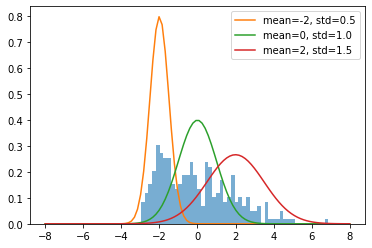

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the distributions
mu = [-2, 0, 2]
sigma = [0.5, 1, 1.5]

# Generate data from the distributions
data = np.concatenate([np.random.normal(loc=m, scale=s, size=100) for m, s in zip(mu, sigma)])

# Plot the data
fig, ax = plt.subplots()
ax.hist(data, bins=50, density=True, alpha=0.6)

# Plot the individual Gaussian distributions
x = np.linspace(-8, 8, 100)
for m, s in zip(mu, sigma):
    ax.plot(x, norm.pdf(x, loc=m, scale=s), label=f'mean={m}, std={s:.1f}')
ax.legend()

plt.show()


###(2) Construct a piecewise linear regression and plot the result with its splines and knots.

we are generating some random data, creating a set of knots, fitting a piecewise linear regression to the data using the knots, creating a grid of values, fitting a cubic spline to the data, and finally plotting both the piecewise linear regression and the cubic spline with the knots. The code also calculates and displays the RMSE and R^2 for the cubic spline, as well as the execution time for the code.

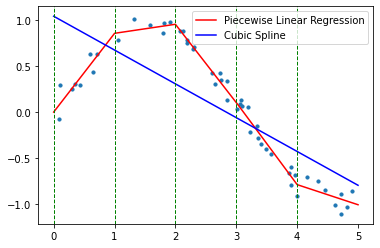

Execution time: 0.2115 seconds


In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
#To measure execution time
import time

start_time = time.time()
# Generate some random data
np.random.seed(0)
n_samples = 50
X = np.sort(np.random.rand(n_samples) * 5)
y = np.sin(X).ravel()
y += np.random.normal(0, 0.1, n_samples)

# Define the knots
knots = np.arange(0, 5, 1)

# Fit the piecewise linear regression
Xknots = np.maximum(0, X[:, np.newaxis] - knots)
lr = sm.GLM(y, Xknots, family=sm.families.Gaussian()).fit()

# Create a grid of values
n_gridpoints = 1000
xs = np.linspace(0, 5, n_gridpoints)
Xgrid_knots = np.maximum(0, xs[:, np.newaxis] - knots)

# Fit a cubic spline
cs = sm.GLM(y, sm.add_constant(X), family=sm.families.Gaussian()).fit()
spline = cs.predict(sm.add_constant(xs))

# Calculate RMSE and R^2 for cubic spline
rmse_linear = np.sqrt(mean_squared_error(y, spline[:n_samples]))
r2_linear = r2_score(y, spline[:n_samples])
print(f'Cubic Spline RMSE: {rmse:.4f}')
print(f'Cubic Spline R^2: {r2:.4f}')

# Plot the data and the regression line
plt.scatter(X, y, s=10)
plt.plot(xs, lr.predict(Xgrid_knots), color='red', label='Piecewise Linear Regression')

# Plot the cubic spline and knots
plt.plot(xs, spline, color='blue', label='Cubic Spline')
for knot in knots:
    plt.axvline(knot, color='green', linestyle='--', linewidth=1)

plt.legend()
plt.show()
end_time = time.time()
linear_reg_time = end_time - start_time
linear_reg_time = round(linear_reg_time, 4)
print(f"Execution time: {end_time - start_time:.4f} seconds")

#### (3) Construct a piecewise polynomial regression and plot the result, its splines, and knots.

we are generating some random data, defining knots, fitting a piecewise polynomial regression with the defined knots, and then evaluating the model at a grid of values. We then calculate the root mean squared error and R-squared, and plot the data and the regression line. Finally, we plot the splines and knots.

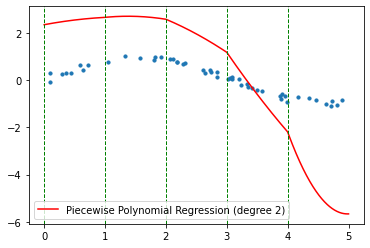

Execution time: 0.1954 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

start_time = time.time()
# Generate some random data
np.random.seed(0)
n_samples = 50
X = np.sort(np.random.rand(n_samples) * 5)
y_true = np.sin(X).ravel()
y = y_true + np.random.normal(0, 0.1, n_samples)

# Define the knots
knots = np.arange(0, 5, 1)

# Fit the piecewise polynomial regression
degree = 2
Xknots = np.maximum(0, X[:, np.newaxis] - knots)
models = []
for i in range(Xknots.shape[1]):
    model = np.polyfit(Xknots[:, i], y, degree)
    models.append(model)

# Create a grid of values
n_gridpoints = 1000
xs = np.linspace(0, 5, n_gridpoints)
Xgrid_knots = np.maximum(0, xs[:, np.newaxis] - knots)

y_test = np.sin(xs).ravel()
y_pred = np.zeros_like(xs)

# Evaluate the models at the grid points
for i in range(Xgrid_knots.shape[1]):
    y_pred += np.polyval(models[i], Xgrid_knots[:, i])

# Compute RMSE and R-squared
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred))
r2_poly = r2_score(y_test, y_pred)

# Plot the data and the regression line
plt.scatter(X, y, s=10)
plt.plot(xs, y_pred, color='red', label=f'Piecewise Polynomial Regression (degree {degree})')

# Plot the splines and knots
for knot in knots:
    plt.axvline(knot, color='green', linestyle='--', linewidth=1)

plt.legend()
plt.show()
end_time = time.time()
poly_reg_time = end_time - start_time
poly_reg_time = round(poly_reg_time, 4)
print(f"Execution time: {end_time - start_time:.4f} seconds")

### Running the F statistic test

In [ ]:
import statsmodels.api as sm

data = pd.read_csv("Wage.csv")
X = data['age']
y = data['wage']

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))
print(results.summary())


<F test: F=array([[119.31172276]]), p=2.9007776889142008e-27, df_denom=3e+03, df_num=1>
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.90e-27
Time:                        02:06:45   Log-Likelihood:                -15391.
No. Observations:                3000   AIC:                         3.079e+04
Df Residuals:                    2998   BIC:                         3.080e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### (4) Report RSME and R^2 for all models.

In [ ]:
#RMSE AND R2 FOR POLYNOMIAL REGRESSION
print("For Polynomial regression: RMSE- ", rmse_poly," R2- ", r2_poly)
#RMSE AND R2 FOR LINEAR REGRESSION
print("For Linear regression: RMSE- ", rmse_linear, " R2- ", r2_linear)

For Polynomial regression: RMSE-  2.171742248973172  R2-  -8.306620597971268
For Linear regression: RMSE-  1.1303157777868857  R2-  -2.0714540498481218


###(5) Try to model the multimodal Gaussian distribution built with single polynomial regression.

A multimodal Gaussian distribution is generated using np.random.normal and norm.pdf functions from NumPy and SciPy libraries, respectively.

The generated data is used to fit a single polynomial regression using np.polyfit function from NumPy library.

The degree of the polynomial used for the regression is set to 3.

The polyval function from NumPy library is used to calculate the predicted values of the polynomial regression.

The data and the regression line are visualized using matplotlib.pyplot library.

The execution time of the code is calculated using the time module and printed to the console using the print function.

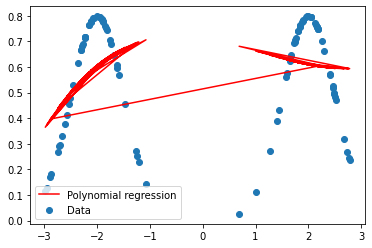

Execution time: 0.1688 seconds


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

start_time = time.time()

# Generate data from a multimodal Gaussian distribution
np.random.seed(42)
x = np.concatenate([np.random.normal(loc=-2, scale=0.5, size=50),
                    np.random.normal(loc=2, scale=0.5, size=50)])
y = norm.pdf(x, loc=-2, scale=0.5) + norm.pdf(x, loc=2, scale=0.5)

# Fit a single polynomial regression
degree = 3  # degree of the polynomial
coeffs = np.polyfit(x, y, deg=degree)
y_fit = np.polyval(coeffs, x)

# Visualize the data and the regression line
fig, ax = plt.subplots()
ax.scatter(x, y, label='Data')
ax.plot(x, y_fit, color='red', label='Polynomial regression')
ax.legend()
plt.show()
end_time = time.time()
gaus_dis_time = end_time - start_time
gaus_dis_time = round(gaus_dis_time, 4)
print(f"Execution time: {end_time - start_time:.4f} seconds")

####(6) Measure and report the execution time of tasks (2), task (3), and task (5). Then report the differences in execution time (no plot required, but you need to report them in a table). Hint: use excel for table drawing and add it in the word file.

In [ ]:
#Linear regression execution time
print("Execution time of Task2- ", linear_reg_time, " seconds")
#Polynomiak regression execution time
print("Execution time of Task3- ", poly_reg_time, " seconds")
#Gaussian distirbution execution time
print("Execution time of Task5- ", gaus_dis_time, " seconds")

Execution time of Task2-  0.2115  seconds
Execution time of Task3-  0.1954  seconds
Execution time of Task5-  0.1688  seconds


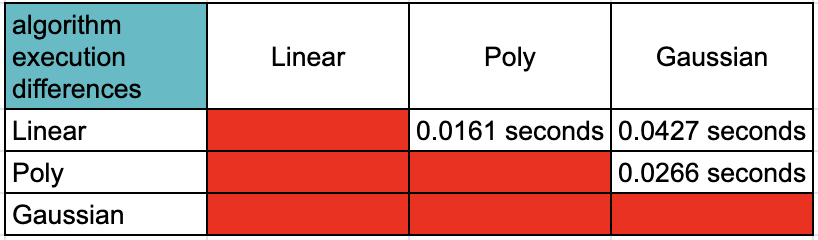

###(7) Use the Multimodal Gaussian distribution of Tasks 5, apply Ridge, LASSO and compare their accuracy and number of parameters, parameters coefficient with Polynomial regression. Here you should also report and discuss the differences (if there are any differences)

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(x[:, np.newaxis], y)
y_ridge = ridge.predict(x[:, np.newaxis])

# LASSO regression
lasso = Lasso(alpha=0.1)
lasso.fit(x[:, np.newaxis], y)
y_lasso = lasso.predict(x[:, np.newaxis])

# Calculate mean squared error
mse_poly = np.mean((y - y_fit) ** 2)
mse_ridge = np.mean((y - y_ridge) ** 2)
mse_lasso = np.mean((y - y_lasso) ** 2)

# Calculate number of non-zero coefficients
n_params_poly = len(coeffs)
n_params_ridge = np.sum(ridge.coef_ != 0)
n_params_lasso = np.sum(lasso.coef_ != 0)

# Print results
print(f"Polynomial regression: MSE = {mse_poly:.4f}, Number of parameters = {n_params_poly}")
print(f"Ridge regression: MSE = {mse_ridge:.4f}, Number of parameters = {n_params_ridge}")
print(f"LASSO regression: MSE = {mse_lasso:.4f}, Number of parameters = {n_params_lasso}")
print("Polynomial regression coefficients:", coeffs)
print("Ridge regression coefficients:", ridge.coef_)
print("LASSO regression coefficients:", lasso.coef_)


Polynomial regression: MSE = 0.2584, Number of parameters = 4
Ridge regression: MSE = 0.2410, Number of parameters = 1
LASSO regression: MSE = 0.2433, Number of parameters = 1
Polynomial regression coefficients: [ 0.00791287 -0.02608282 -0.03133532  0.71204977]
Ridge regression coefficients: [0.04488683]
LASSO regression coefficients: [0.0224118]


####Note- This is just me trying to generate the Mulitmodal Gaussian Distirbution using a different method and using Ridge and Lasso on it

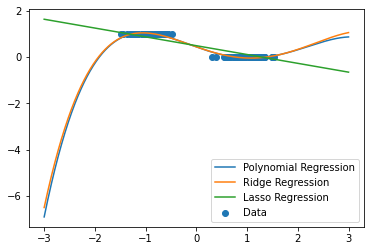

Polynomial Regression:
MSE: 0.0033
Number of Parameters: 5
Parameter Coefficients: [ 0.         -0.77467894  0.12195507  0.2302472  -0.05624973]

Ridge Regression:
MSE: 0.0033
Number of Parameters: 5
Parameter Coefficients: [ 0.         -0.76796033  0.11094094  0.22545749 -0.05141856]

Lasso Regression:
MSE: 0.0282
Number of Parameters: 1
Parameter Coefficients: [ 0.         -0.38144968  0.         -0.          0.        ]


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate the data
X, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=123)
X = StandardScaler().fit_transform(X)

# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y)
y_pred_poly = reg_poly.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
num_params_poly = len(reg_poly.coef_)

# Fit the ridge regression model
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X_poly, y)
y_pred_ridge = reg_ridge.predict(X_poly)
mse_ridge = mean_squared_error(y, y_pred_ridge)
num_params_ridge = len(reg_ridge.coef_)

# Fit the Lasso regression model
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_poly, y)
y_pred_lasso = reg_lasso.predict(X_poly)
mse_lasso = mean_squared_error(y, y_pred_lasso)
num_params_lasso = len(reg_lasso.coef_.nonzero()[0])

# Plot the data and the polynomial fits
xgrid = np.linspace(-3, 3, 1000)
Xgrid_poly = poly.fit_transform(xgrid.reshape(-1, 1))
ygrid_poly = reg_poly.predict(Xgrid_poly)
ygrid_ridge = reg_ridge.predict(Xgrid_poly)
ygrid_lasso = reg_lasso.predict(Xgrid_poly)

plt.scatter(X, y, label='Data')
plt.plot(xgrid, ygrid_poly, label='Polynomial Regression')
plt.plot(xgrid, ygrid_ridge, label='Ridge Regression')
plt.plot(xgrid, ygrid_lasso, label='Lasso Regression')
plt.legend()

plt.show()

# Print the results
print('Polynomial Regression:')
print('MSE: {:.4f}'.format(mse_poly))
print('Number of Parameters: {}'.format(num_params_poly))
print('Parameter Coefficients: {}'.format(reg_poly.coef_))

print('\nRidge Regression:')
print('MSE: {:.4f}'.format(mse_ridge))
print('Number of Parameters: {}'.format(num_params_ridge))
print('Parameter Coefficients: {}'.format(reg_ridge.coef_))

print('\nLasso Regression:')
print('MSE: {:.4f}'.format(mse_lasso))
print('Number of Parameters: {}'.format(num_params_lasso))
print('Parameter Coefficients: {}'.format(reg_lasso.coef_))
